# Import Libs

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, auc, roc_curve
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import make_moons, make_gaussian_quantiles

# Read data into variable and dump it

In [29]:
data = pd.read_csv("diabetes.csv")
data = pd.DataFrame(data = data);
#Split into positive and negative
positive_outcomes = data[data["Outcome"] == 1]
negative_outcomes = data[data["Outcome"] == 0]

print (data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

# Validate data

In [30]:
data.groupby('Outcome').describe()

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        109.980000  ...                  0.56175  2.329  500.0  31.190000   
1        141.257463  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 64 columns]

In [31]:
# Freely choosed limit from reading out data
print('Insulin level > 500: ', (data.Insulin > 500).sum())
data.loc[data.Insulin > 500, 'Insulin']

Insulin level > 500:  9


8      543
13     846
228    744
247    680
286    545
409    579
584    600
655    540
753    510
Name: Insulin, dtype: int64

In [32]:
# No null (missing) values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
#no monotonous data
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# Visualization

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

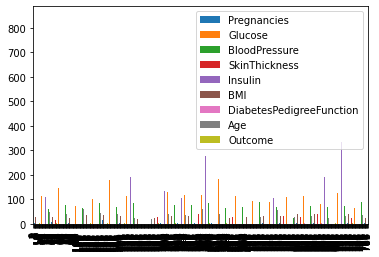

In [34]:
data.plot(kind='bar')
data.count()

Group data by outcome and visualise

[500 268]
Percentage of diabetes { Negative : Positive } : [65.10416667 34.89583333]


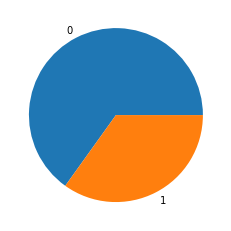

In [35]:
data_grouped = data
data_grouped.groupby('Outcome').describe()
data_counted = data_grouped.groupby('Outcome').count().loc[:,'Age'].values
group_names = data.groupby('Outcome').count().index.values
print(data_counted)
outcome_percentage = (data_counted/len(data_grouped))*100
print("Percentage of diabetes { Negative : Positive } :",outcome_percentage)
plt.pie(outcome_percentage, labels = group_names);
plt.show()

Distribution by **age**


*   Most cases have age in between 20 and 30 by looking at the plotted mean




Age distribution


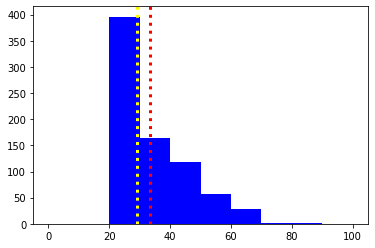

In [36]:

print("Age distribution")
plt.hist(data.Age, range=(0,100), color = 'blue')
age_outcome_positive=data[(data["Age"])&(data["Outcome"] == 1)]
age_outcome_negative=data[(data["Age"])&(data["Outcome"] == 0)]
plt.axvline(data.Age.mean(), color='red', linestyle='dotted', linewidth=3)
plt.axvline(data.Age.median(), color='yellow', linestyle='dotted', linewidth=3)


Distribution by **Age** by **outcome**

(array([  0.,   0., 163.,  45.,  22.,  12.,  12.,   0.,   1.,   0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

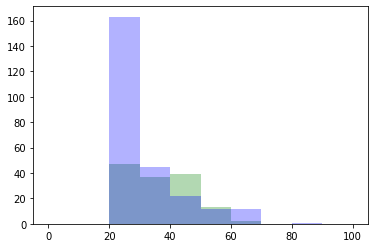

In [37]:
#Distribution
age_outcome_positive=data[(data["Age"])&(data["Outcome"] == 1)]
age_outcome_negative=data[(data["Age"])&(data["Outcome"] == 0)]
plt.hist(age_outcome_positive.Age, range=(0,100), label='Positive', color='green', alpha=0.3)
plt.hist(age_outcome_negative.Age, range=(0,100), label='Negative', color='blue', alpha=0.3)

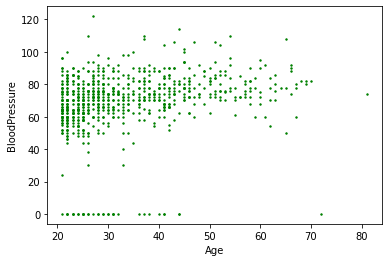

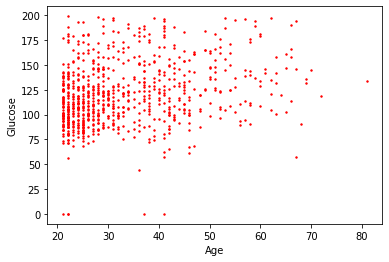

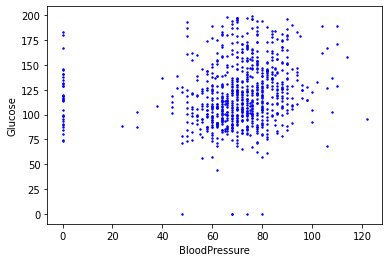

In [38]:
# Scatter plot of Outcome by age
data.plot.scatter(x = 'Age', y = 'BloodPressure',s=2, c='g')
data.plot.scatter(x = 'Age', y = 'Glucose',s=2, c='r')
data.plot.scatter(x = 'BloodPressure', y = 'Glucose',s=2, c='b')
plt.show()
# data.boxplot(column = ['Age'], by = 'Outcome')

Boxplot of Age by outcome

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


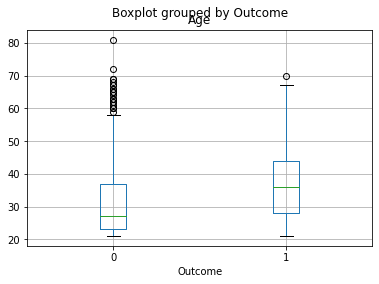

In [39]:
data.boxplot(column = 'Age', by = 'Outcome')

HeatMap

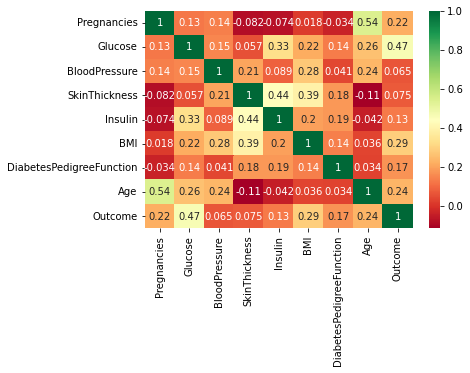

In [40]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()

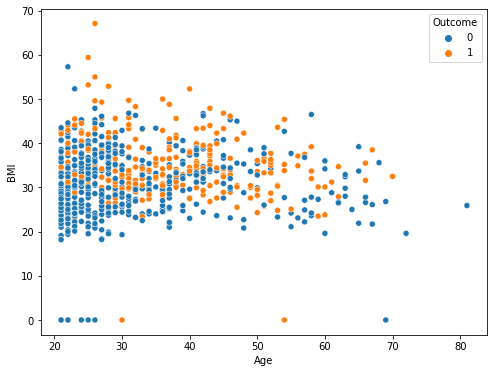

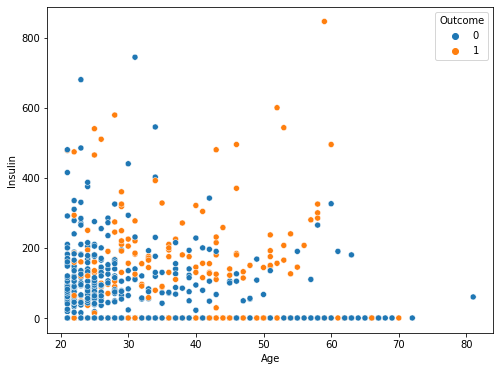

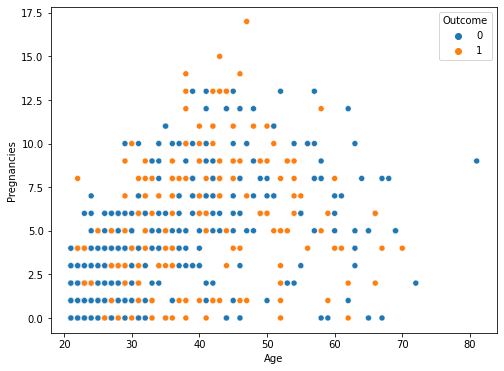

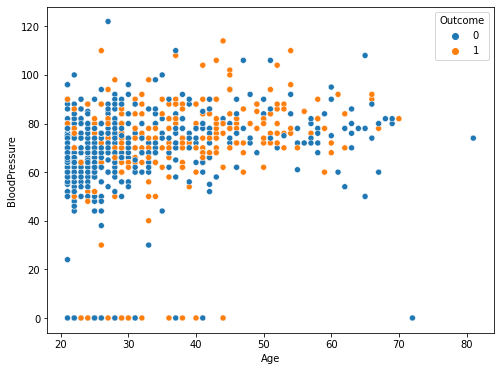

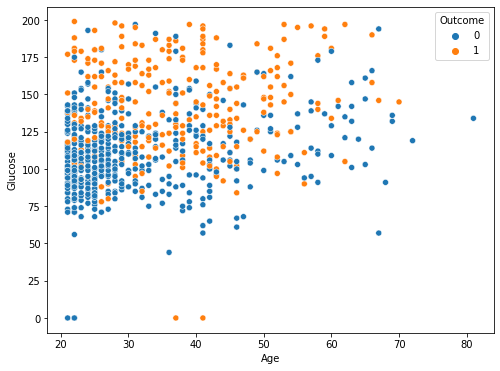

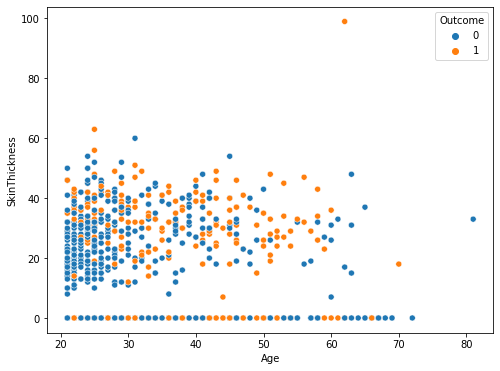

In [41]:
# Scatter like in matlab Outcome for different parameters by age
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=data) 

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Age', y='Insulin', hue='Outcome', data=data) 

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Age', y='Pregnancies', hue='Outcome', data=data) 

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Age', y='BloodPressure', hue='Outcome', data=data)

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=data)

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Age', y='SkinThickness', hue='Outcome', data=data) 



Outcome by gloucoze

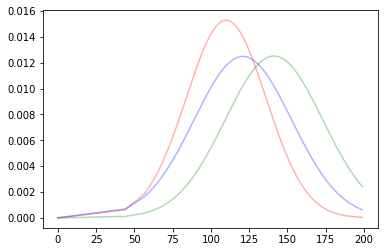

In [42]:
#calculate by positive and negative outcomes, and overall
glucose_mean_p = np.mean(positive_outcomes['Glucose'])
glucose_std_p = np.std(positive_outcomes['Glucose'])
glucose_median_p = np.median(positive_outcomes['Glucose'].sort_values())

glucose_mean_n = np.mean(negative_outcomes['Glucose'])
glucose_std_n = np.std(negative_outcomes['Glucose'])
glucose_median_n = np.median(negative_outcomes['Glucose'].sort_values())

glucose_mean = np.mean(data['Glucose'])
glucose_std = np.std(data['Glucose'])
glucose_median = np.median(data['Glucose'].sort_values())
#plot positive
plt.plot(
    data['Glucose'].sort_values()
    ,norm.pdf(
        data['Glucose'].sort_values()
        , glucose_mean_p
        , glucose_std_p
    )
    ,color='green'
    ,alpha=0.3
)
#plot negative
plt.plot(
    data['Glucose'].sort_values()
    ,norm.pdf(
        data['Glucose'].sort_values()
        , glucose_mean_n
        , glucose_std_n
    )
    ,color='red'
    ,alpha=0.3
)
#plot overall
plt.plot(
    data['Glucose'].sort_values()
    ,norm.pdf(
        data['Glucose'].sort_values()
        , glucose_mean
        , glucose_std
    )
    ,color='blue'
    ,alpha=0.3
)

plt.show()

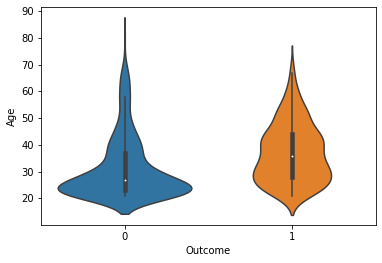

In [43]:
#Violin plot 
sns.violinplot(x="Outcome", y="Age", data=data)
plt.show()

# **Part 2.**

# **Predictions**

Split the data for training

In [44]:
target = 'Outcome'

y = data[target] #truth/actual values
X = data.drop(target, axis=1) #all features beside target (dropped column wise)
print(X.shape,y.shape)

(768, 8) (768,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)

test_sc = scaler.transform(X_test)

Logistic Regression

In [46]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(train_sc,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

KNN

In [47]:
knn = KNeighborsClassifier()
knn.fit(train_sc, y_train)

KNeighborsClassifier()

In [48]:
#Random forest
rfc = RandomForestClassifier()
rfc.fit(train_sc,y_train)

RandomForestClassifier()

In [49]:
#XGB classifier fit
xgb = XGBClassifier()
xgb.fit(train_sc,y_train)

XGBClassifier()

In [54]:
#Predictions
lr_pred = lr.predict(test_sc)
knn_pred = knn.predict(test_sc)
rfc_pred = rfc.predict(test_sc)
xgb_pred = xgb.predict(test_sc)

# logistic regression accuracy score
print('logistic regression scored: ', accuracy_score(y_test,lr_pred)*100)

print("Accuracy:",metrics.accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

# KNN classifier accuracy score
print('KNN classifier scored: ', accuracy_score(y_test,knn_pred)*100)
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# Random Forest Classifier accuracy score
print('Random Forest Classifier scored: ', accuracy_score(y_test,rfc_pred)*100)
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

# XGBClassifier accuracy score
print('XGBClassifier scored: ', accuracy_score(y_test,xgb_pred)*100)
print("Accuracy:",metrics.accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

logistic regression scored:  79.22077922077922
Accuracy: 0.7922077922077922
[[142  15]
 [ 33  41]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       157
           1       0.73      0.55      0.63        74

    accuracy                           0.79       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.79      0.79      0.78       231

KNN classifier scored:  78.78787878787878
Accuracy: 0.7878787878787878
[[137  20]
 [ 29  45]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.69      0.61      0.65        74

    accuracy                           0.79       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.78      0.79      0.78       231

Random Forest Classifier scored:  87.01298701298701
Accuracy: 0.8701298701298701
[[144  13]
 [ 17  57]]
              precision    recall  f1-score   sup

AUC / ROC

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


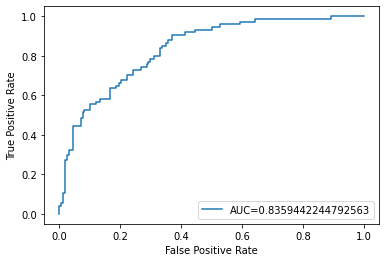

In [55]:
# ROC I AUC
X = data[['Glucose', 'BMI', 'Age']]
y = data['Outcome']

log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [56]:
#J48
#3
X = data[['Pregnancies', 'BMI', 'Age']]
y = data.Outcome

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.7316017316017316
[[124  33]
 [ 29  45]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       157
           1       0.58      0.61      0.59        74

    accuracy                           0.73       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.74      0.73      0.73       231



In [57]:
#J48
#5
X = data[['Pregnancies', 'BMI', 'Insulin', 'Age', 'BloodPressure']]
y = data.Outcome

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.7316017316017316
[[125  32]
 [ 30  44]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       157
           1       0.58      0.59      0.59        74

    accuracy                           0.73       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.73      0.73       231



In [58]:
#J48
#7
X = data[['Pregnancies', 'BMI', 'Insulin', 'Glucose', 'Age', 'BloodPressure', 'DiabetesPedigreeFunction']]
y = data.Outcome

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.7445887445887446
[[128  29]
 [ 30  44]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       157
           1       0.60      0.59      0.60        74

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



Compared to published results, on the article page, I have achieved very similar, nearely indentical results which validates the correct and accurate data processing results and predictions.